In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from trainer import MinimaxTrainer, QLearningTrainer

## Functions

In [2]:
def plot_rewards(rewards, title, window_size=10):
    """
    Grafica la recompensa por episodio y su media móvil.
    
    :param rewards: Lista de recompensas obtenidas en cada episodio.
    :param window_size: Tamaño de la ventana para el promedio móvil.
    """
    episodes = np.arange(len(rewards))
    
    # Cálculo del promedio móvil
    smoothed_rewards = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')
    
    plt.figure(figsize=(10, 5))
    plt.plot(episodes, rewards, label='Recompensa por episodio', alpha=0.5)
    plt.plot(episodes[:len(smoothed_rewards)], smoothed_rewards, label=f'Promedio móvil (window={window_size})', color='red', linewidth=2)
    
    plt.xlabel('Episodios')
    plt.ylabel('Recompensa')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Minimax

## MR vs Random

In [3]:
trainer = MinimaxTrainer(steps=1000000, player='B', opponent='random', pi_table={})
MR_hist_reward2, pi_table_MR2 = trainer.train()

 .   .   .   .   . 
 .   .   .   A   . 
 .   Bo  .   .   . 
 .   .   .   .   . 
Scores: {'A': 0, 'B': 0}


Progreso:   1%|          | 6840/1000000 [00:06<14:56, 1107.75step/s]


KeyboardInterrupt: 

In [ ]:

with open("results/pi_table_MR2.txt", "w") as f:
    f.write(str(pi_table_MR2))

In [ ]:
trainer = MinimaxTrainer(steps=1000000, player='A', opponent='random', pi_table={})
MR_hist_reward, pi_table_MR  = trainer.train()

with open("results/pi_table_MR.txt", "w") as f:
    f.write(str(pi_table_MR))

 .   .   .   .   . 
 .   .   .   Ao  . 
 .   B   .   .   . 
 .   .   .   .   . 
Scores: {'A': 0, 'B': 0}


Progreso: 100%|██████████| 1000000/1000000 [12:43<00:00, 1310.53step/s]


Played games: 45601
...Running validation...
Se completaron 6 juegos y se ganó el 100.0% 


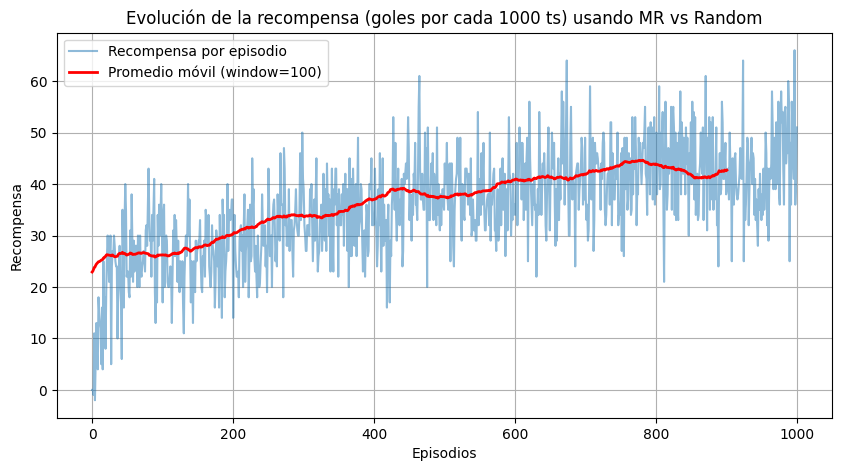

In [ ]:
title = 'Evolución de la recompensa (goles por cada 1000 ts) usando MR vs Random'
plot_rewards(MR_hist_reward,title, window_size=100)


## MR-Challenger vs Random


In [ ]:
with open("results/pi_table_MR.txt", "r") as f:
    contenido = f.read()
    pi_table_MR = eval(contenido)  # Convierte el texto de nuevo en un diccionario

trainer = MinimaxTrainer(steps=1000000, player='B', opponent='pi_table', pi_table=pi_table_MR)
MRC_hist_reward, pi_table_MRC  = trainer.train()

with open("results/pi_table_MRC.txt", "w") as f:
    f.write(str(pi_table_MRC))

 .   .   .   .   . 
 .   .   .   Ao  . 
 .   B   .   .   . 
 .   .   .   .   . 
Scores: {'A': 0, 'B': 0}


Progreso: 100%|██████████| 1000000/1000000 [14:44<00:00, 1131.22step/s]

Played games: 70557
...Running validation...
Se completaron 6 juegos y se ganó el 100.0% 


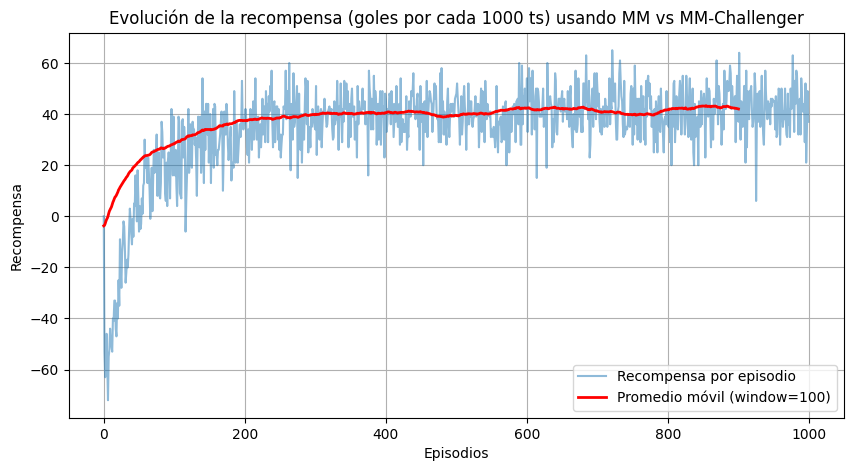

In [ ]:
title = 'Evolución de la recompensa (goles por cada 1000 ts) usando MM vs MM-Challenger'
plot_rewards(MRC_hist_reward,title, window_size=100)

## MM

In [ ]:
trainer = MinimaxTrainer(steps=1000000, player='A', opponent='minimax', pi_table={})
MM_hist_reward, pi_table_MM, pi_table_MM2  = trainer.train()

with open("results/pi_table_MM.txt", "w") as f:
    f.write(str(pi_table_MM))

 .   .   .   .   . 
 .   .   .   A   . 
 .   Bo  .   .   . 
 .   .   .   .   . 
Scores: {'A': 0, 'B': 0}


Progreso: 100%|██████████| 1000000/1000000 [23:29<00:00, 709.63step/s]

Played games: 91025
...Running validation...
Se completaron 9 juegos y se ganó el 100.0% 


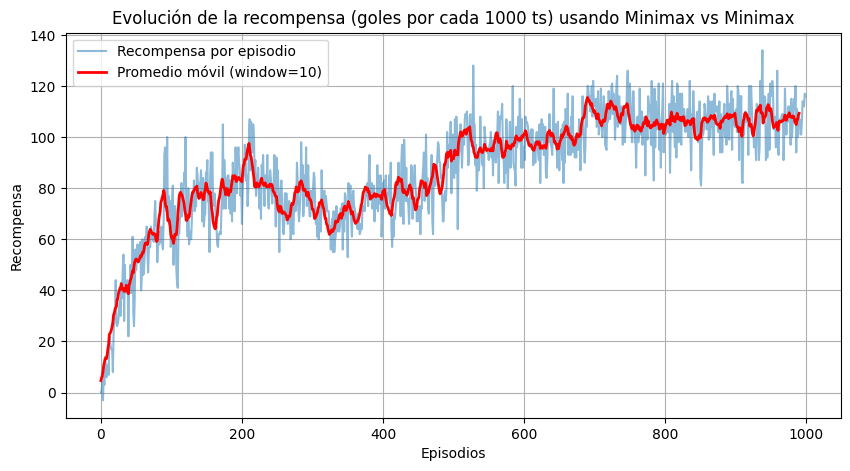

In [ ]:
title = 'Evolución de la recompensa (goles por cada 1000 ts) usando Minimax vs Minimax'
plot_rewards(MM_hist_reward,title, window_size=10)

## MM-Challenger

In [ ]:
with open("results/pi_table_MM.txt", "r") as f:
    contenido = f.read()
    pi_table_MM = eval(contenido)  # Convierte el texto de nuevo en un diccionario

trainer = MinimaxTrainer(steps=1000000, player='B', opponent='pi_table', pi_table=pi_table_MM)
MMC_hist_reward, pi_table_MMC  = trainer.train()

with open("results/pi_table_MMC.txt", "w") as f:
    f.write(str(pi_table_MMC))

 .   .   .   .   . 
 .   .   .   A   . 
 .   Bo  .   .   . 
 .   .   .   .   . 
Scores: {'A': 0, 'B': 0}


Progreso: 100%|██████████| 1000000/1000000 [12:32<00:00, 1329.76step/s]

Played games: 91372
...Running validation...
Se completaron 3 juegos y se ganó el 100.0% 


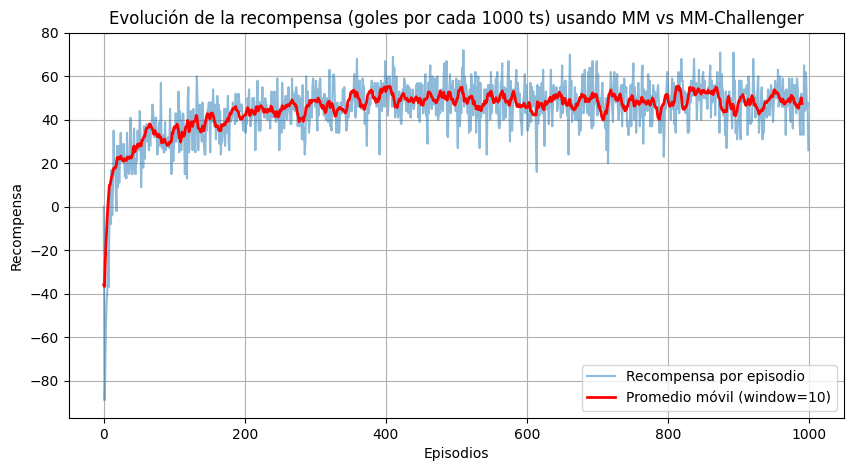

In [ ]:
title = 'Evolución de la recompensa (goles por cada 1000 ts) usando MM vs MM-Challenger'
plot_rewards(MMC_hist_reward,title, window_size=10)

# Q-Learning Algorithm

## QR

In [ ]:
trainer = QLearningTrainer(steps=1000000, player='A', opponent='random', pi_table={}, render=False)
QR_hist_reward, q_table_QR  = trainer.train()

with open("results/q_table_QR.txt", "w") as f:
    f.write(str(q_table_QR))

 .   .   .   .   . 
 .   .   .   A   . 
 .   Bo  .   .   . 
 .   .   .   .   . 
Scores: {'A': 0, 'B': 0}


Progreso: 100%|██████████| 1000000/1000000 [00:14<00:00, 67601.90step/s]

Played games: 108118
...Running validation...
Se completaron 12 juegos y se ganó el 100.0% 


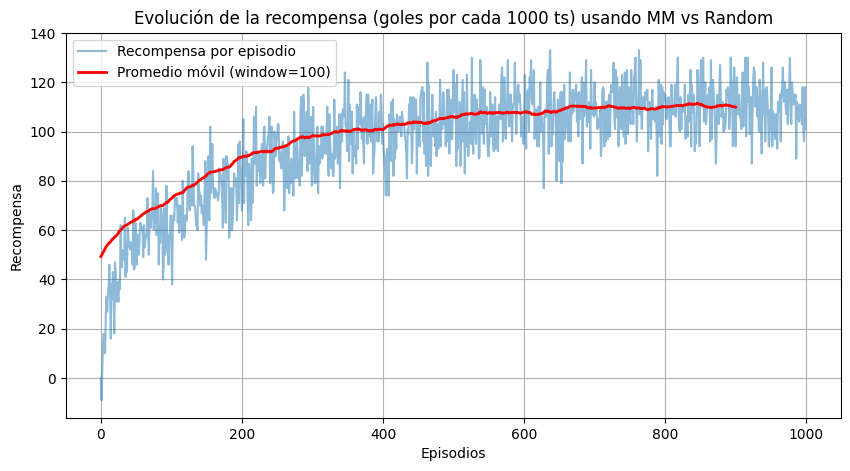

In [ ]:
title = 'Evolución de la recompensa (goles por cada 1000 ts) usando MM vs Random'
plot_rewards(QR_hist_reward, title, window_size=100)

## QR - Challenger

In [ ]:
with open("results/q_table_QR.txt", "r") as f:
    contenido = f.read()
    q_table_QR = eval(contenido)  # Convierte el texto de nuevo en un diccionario

trainer = QLearningTrainer(steps=1000000, player='B', opponent='pi_table', pi_table=q_table_QR)
QRC_hist_reward, q_table_QRC  = trainer.train()

with open("results/q_table_QRC.txt", "w") as f:
    f.write(str(q_table_QRC))

 .   .   .   .   . 
 .   .   .   A   . 
 .   Bo  .   .   . 
 .   .   .   .   . 
Scores: {'A': 0, 'B': 0}


Progreso: 100%|██████████| 1000000/1000000 [00:17<00:00, 57397.59step/s]

Played games: 185106
...Running validation...
Se completaron 4 juegos y se ganó el 50.0% 


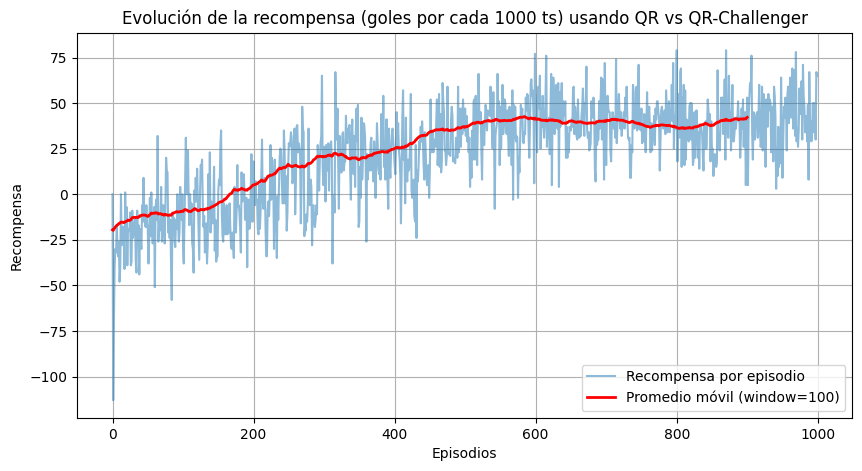

In [ ]:
title = 'Evolución de la recompensa (goles por cada 1000 ts) usando QR vs QR-Challenger'
plot_rewards(QRC_hist_reward,title, window_size=100)

## QQ

In [ ]:
trainer = QLearningTrainer(steps=1000000, player='A', opponent='q-learning', pi_table={}, render=False)
QQ_hist_reward, q_table_QQ, q_table_QQ2  = trainer.train()

with open("results/q_table_QQ.txt", "w") as f:
    f.write(str(q_table_QQ))

 .   .   .   .   . 
 .   .   .   A   . 
 .   Bo  .   .   . 
 .   .   .   .   . 
Scores: {'A': 0, 'B': 0}


Progreso: 100%|██████████| 1000000/1000000 [00:25<00:00, 39904.08step/s]

Played games: 208313
...Running validation...
Se completaron 6 juegos y se ganó el 100.0% 


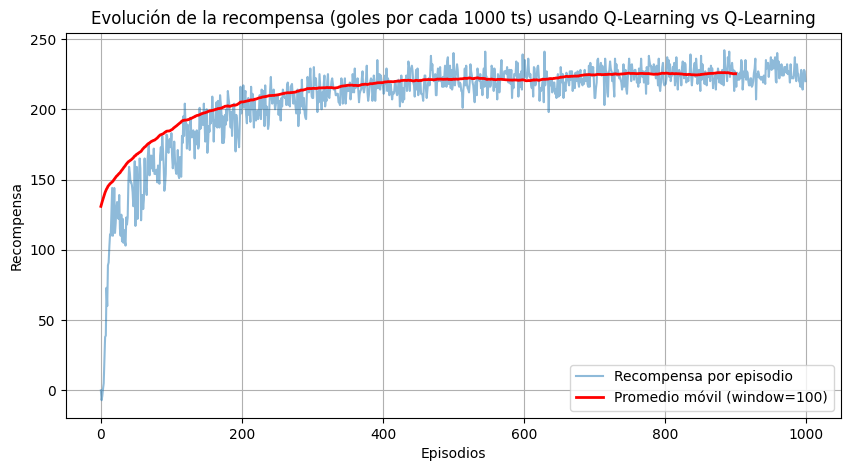

In [ ]:
title = 'Evolución de la recompensa (goles por cada 1000 ts) usando Q-Learning vs Q-Learning'
plot_rewards(QQ_hist_reward,title, window_size=100)

## QQ - Challenger

In [ ]:
with open("results/q_table_QQ.txt", "r") as f:
    contenido = f.read()
    q_table_QQ = eval(contenido)  # Convierte el texto de nuevo en un diccionario

trainer = QLearningTrainer(steps=1000000, player='B', opponent='pi_table', pi_table=q_table_QQ)
QQC_hist_reward, q_table_QQC = trainer.train()

with open("results/q_table_QQC.txt", "w") as f:
    f.write(str(q_table_QQC))

 .   .   .   .   . 
 .   .   .   A   . 
 .   Bo  .   .   . 
 .   .   .   .   . 
Scores: {'A': 0, 'B': 0}


Progreso: 100%|██████████| 1000000/1000000 [00:17<00:00, 57014.80step/s]

Played games: 165979
...Running validation...
Se completaron 6 juegos y se ganó el 66.66666666666666% 


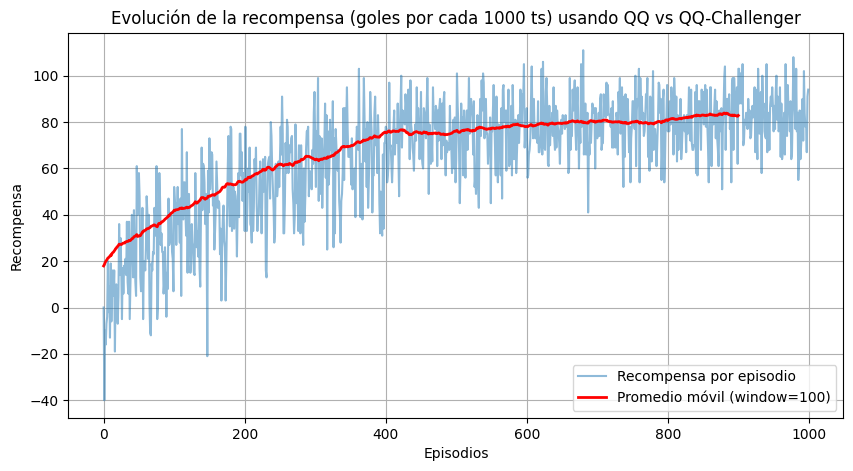

In [ ]:
title = 'Evolución de la recompensa (goles por cada 1000 ts) usando QQ vs QQ-Challenger'
plot_rewards(QQC_hist_reward,title, window_size=100)

## Evaluation

In [5]:
with open("results/pi_table_MR.txt", "r") as f:
    contenido = f.read()
    pi_table_MR = eval(contenido)  # Convierte el texto de nuevo en un diccionario

with open("results/pi_table_MR2.txt", "r") as f:
    contenido = f.read()
    pi_table_MR2 = eval(contenido)

with open("results/pi_table_MRC.txt", "r") as f:
    contenido = f.read()
    pi_table_MRC = eval(contenido)  

with open("results/pi_table_MM.txt", "r") as f:
    contenido = f.read()
    pi_table_MM = eval(contenido)  

with open("results/pi_table_MMC.txt", "r") as f:
    contenido = f.read()
    pi_table_MMC = eval(contenido)  

with open("results/q_table_QR.txt", "r") as f:
    contenido = f.read()
    q_table_QR = eval(contenido)  

with open("results/q_table_QRC.txt", "r") as f:
    contenido = f.read()
    q_table_QRC = eval(contenido)  

with open("results/q_table_QQ.txt", "r") as f:
    contenido = f.read()
    q_table_QQ = eval(contenido) 

with open("results/q_table_QQC.txt", "r") as f:
    contenido = f.read()
    q_table_QQC = eval(contenido) 

### MR vs Random

In [6]:
validator = MinimaxTrainer(steps=1000000, player='A', opponent='random', pi_table={})
validator.run_validation(pi_table_MR, render=True, steps=100000)

 .   .   .   .   . 
 .   .   .   .   . 
 .   .   A   .   . 
 Bo  .   .   .   . 
Scores: {'A': 2, 'B': 1}


KeyboardInterrupt: 

### MR vs MR-Challenger

In [7]:
validator = MinimaxTrainer(steps=1000000, player='A', opponent='pi-table', pi_table=pi_table_MRC)
validator.run_validation(pi_table_MR, render=True, opponent = 'pi_table', pi_table_opponent= pi_table_MRC, steps=100000)

 .   .   .   .   . 
 .   .   .   A   . 
 .   Bo  .   .   . 
 .   .   .   .   . 
Scores: {'A': 5, 'B': 8}
Se completaron 13 juegos y se ganó el 38.46153846153847% 


### MM vs Random

In [22]:
validator = MinimaxTrainer(steps=1000000, player='A', opponent='random', pi_table={})
validator.run_validation(pi_table_MM, render=False, steps=100000)

Game reset. Ball possession: B
Se completaron 9487 juegos y se ganó el 97.04859281121536% 


### MM vs MM-Challenger

In [23]:
validator = MinimaxTrainer(steps=1000000, player='A', opponent='pi-table', pi_table=pi_table_MMC)
validator.run_validation(pi_table_MM, render=False, opponent = 'pi_table', pi_table_opponent= pi_table_MMC, steps=100000)

Game reset. Ball possession: B
Se completaron 5015 juegos y se ganó el 58.1655034895314% 


### QR vs Random

In [24]:
validator = QLearningTrainer(steps=1000000, player='A', opponent='random', pi_table={})
validator.run_validation(q_table_QR, render=False, steps=100)

Game reset. Ball possession: A
Se completaron 13 juegos y se ganó el 92.3076923076923% 


### QR vs QR-Challenger

In [25]:
validator = QLearningTrainer(steps=1000000, player='A', opponent='q-table', pi_table=q_table_QRC)
validator.run_validation(q_table_QR, render=False, opponent = 'pi_table', Q_table_opponent = q_table_QRC, steps=100000)

Game reset. Ball possession: B
Se completaron 23510 juegos y se ganó el 26.75031901318588% 


### QQ vs Random

In [26]:
validator = QLearningTrainer(steps=1000000, player='A', opponent='random', pi_table={})
validator.run_validation(q_table_QQ, render=False, steps=100000)

Game reset. Ball possession: A
Se completaron 12739 juegos y se ganó el 94.15181725410157% 


### QQ vs QQ-Challenger

In [27]:
validator = QLearningTrainer(steps=1000000, player='A', opponent='q-table', pi_table=q_table_QQC)
validator.run_validation(q_table_QQ, render=False, opponent = 'pi_table', Q_table_opponent = q_table_QQC, steps=100000)

Game reset. Ball possession: A
Se completaron 15155 juegos y se ganó el 11.963048498845266% 
